<a href="https://colab.research.google.com/github/dwityantherrys/PCVK_GENAP_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan 70


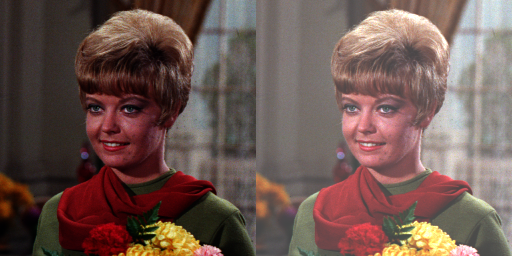

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np 

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 40
Masukkan kontras [1.0 - 3.0]: 2


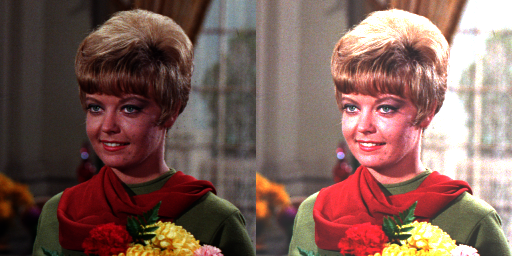

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np 

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

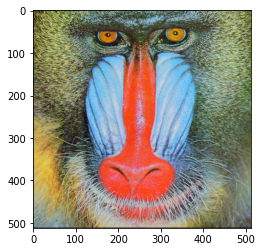

In [8]:
img_m = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

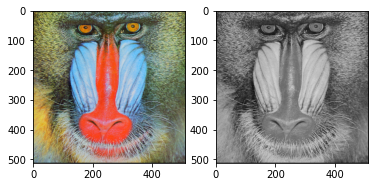

In [9]:
img_avg = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

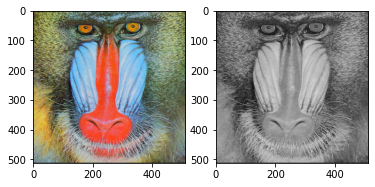

In [10]:
img_light = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

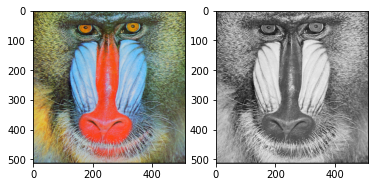

In [11]:
image_lum = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

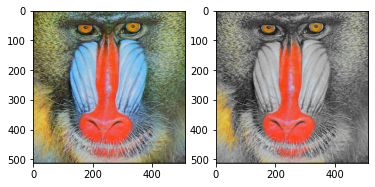

In [12]:
img_4 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')